In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

## Data import and EDA

In [172]:
# download the data
data_train=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                 names=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship",
                         "race","sex","capital_gain","capital_loss","hoursperweek","native_country","Wage"])
data_test=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",
                 names=["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship",
                         "race","sex","capital_gain","capital_loss","hoursperweek","native_country","Wage"])

In [173]:
# Data wrangling
# 1. Glance at the data 
data_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,Wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [145]:
data_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,Wage
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [174]:
# remove the first row in data_test
data_test.drop(data_test.index[0],inplace=True)

In [147]:
data_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,Wage
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [175]:
# transform string into float so we can use sklearn model functions:
# for training data set:
# remove leading space while transform the data
# assign the number by how similar each label is to others
data_train.workclass=data_train.workclass.map(lambda x: x.strip())
data_train.workclass=data_train.workclass.map({'Private': 4, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 7, 'Local-gov': 5, 'State-gov': 6, 'Without-pay':1, 'Never-worked':0})

data_train.education=data_train.education.map(lambda x: x.strip())
data_train.education=data_train.education.map({'Bachelors':11, 'Some-college':10, '11th':6, 'HS-grad':12, 'Prof-school':14, 'Assoc-acdm':8, 'Assoc-voc':9, '9th':4, '7th-8th':3, '12th':7, 'Masters':13, '1st-4th': 1, '10th':5, 'Doctorate':15, '5th-6th':2, 'Preschool':0})

data_train.marital_status=data_train.marital_status.map(lambda x: x.strip())
data_train.marital_status=data_train.marital_status.map({'Married-civ-spouse':1, 'Divorced':5, 'Never-married':0, 'Separated':4, 'Widowed':6, 'Married-spouse-absent':3, 'Married-AF-spouse':2})

# this numbering is not assigned by similarity since I do not know how to determine the similarity
data_train.occupation=data_train.occupation.map(lambda x: x.strip())
data_train.occupation=data_train.occupation.map({'Tech-support':0, 'Craft-repair':1, 'Other-service':2, 'Sales':3, 'Exec-managerial':4, 'Prof-specialty':5, 'Handlers-cleaners':6, 'Machine-op-inspct':7, 'Adm-clerical':8, 'Farming-fishing':9, 'Transport-moving':10, 'Priv-house-serv':11, 'Protective-serv':12, 'Armed-Forces':13})

# assign the number by how similar each label is to others    
data_train.relationship=data_train.relationship.map(lambda x: x.strip())
data_train.relationship=data_train.relationship.map({'Wife':1, 'Own-child':0, 'Husband':2, 'Not-in-family':5, 'Other-relative':3, 'Unmarried':4 })

# this numbering is not assigned by similarity since I do not know how to determine the similarity 
data_train.race=data_train.race.map(lambda x: x.strip())
data_train.race=data_train.race.map({'White':0, 'Asian-Pac-Islander':1, 'Amer-Indian-Eskimo':2, 'Other':3, 'Black':4})

data_train.sex=data_train.sex.map(lambda x: x.strip())
data_train.sex=data_train.sex.map({'Female':0, 'Male':1})

data_train.native_country=data_train.native_country.map(lambda x: x.strip())
data_train.native_country=data_train.native_country.map({'United-States':0, 'Cambodia':1, 'England':2, 'Puerto-Rico':3, 'Canada':4, 'Germany':5, 'Outlying-US(Guam-USVI-etc)':6, 'India':7, 'Japan':8, "Greece":9, 'South':10, 'China':11, 'Cuba':12, 'Iran':13, 'Honduras':14, 
                                           'Philippines':15, 'Italy':16, 'Poland':17, 'Jamaica':18, 'Vietnam':19, 'Mexico':20, 'Portugal':21, 'Ireland':22, 'France':23, 'Dominican-Republic':24, 'Laos':25, 'Ecuador':26, 'Taiwan':27, 'Haiti':28, 'Columbia':29, 
                                           'Hungary':30, 'Guatemala':31, 'Nicaragua':32, 'Scotland':33, 'Thailand':34, 'Yugoslavia':35, 'El-Salvador':36, 'Trinadad&Tobago':37, 'Peru':38, 'Hong':39, 'Holand-Netherlands':40})

data_train.Wage=data_train.Wage.map(lambda x: x.strip())
data_train.Wage=data_train.Wage.map({'<=50K':0, '>50K':1})

In [176]:
# transformed data:
data_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,Wage
0,39,6.0,77516,11,13,0,8.0,5,0,1,2174,0,40,0.0,0
1,50,2.0,83311,11,13,1,4.0,2,0,1,0,0,13,0.0,0
2,38,4.0,215646,12,9,5,6.0,5,0,1,0,0,40,0.0,0
3,53,4.0,234721,6,7,1,6.0,2,4,1,0,0,40,0.0,0
4,28,4.0,338409,11,13,1,5.0,1,4,0,0,0,40,12.0,0


In [177]:
# drop observations with NA
clean_train=data_train.dropna(axis=0, how='any')

In [178]:
# for test data set:
data_test.workclass=data_test.workclass.map(lambda x: x.strip())
data_test.workclass=data_test.workclass.map({'Private': 4, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 7, 'Local-gov': 5, 'State-gov': 6, 'Without-pay':1, 'Never-worked':0})

data_test.education=data_test.education.map(lambda x: x.strip())
data_test.education=data_test.education.map({'Bachelors':11, 'Some-college':10, '11th':6, 'HS-grad':12, 'Prof-school':14, 'Assoc-acdm':8, 'Assoc-voc':9, '9th':4, '7th-8th':3, '12th':7, 'Masters':13, '1st-4th': 1, '10th':5, 'Doctorate':15, '5th-6th':2, 'Preschool':0})

data_test.marital_status=data_test.marital_status.map(lambda x: x.strip())
data_test.marital_status=data_test.marital_status.map({'Married-civ-spouse':1, 'Divorced':5, 'Never-married':0, 'Separated':4, 'Widowed':6, 'Married-spouse-absent':3, 'Married-AF-spouse':2})

# this numbering is not assigned by similarity since I do not know how to determine the similarity
data_test.occupation=data_test.occupation.map(lambda x: x.strip())
data_test.occupation=data_test.occupation.map({'Tech-support':0, 'Craft-repair':1, 'Other-service':2, 'Sales':3, 'Exec-managerial':4, 'Prof-specialty':5, 'Handlers-cleaners':6, 'Machine-op-inspct':7, 'Adm-clerical':8, 'Farming-fishing':9, 'Transport-moving':10, 'Priv-house-serv':11, 'Protective-serv':12, 'Armed-Forces':13})

# assign the number by how similar each label is to others    
data_test.relationship=data_test.relationship.map(lambda x: x.strip())
data_test.relationship=data_test.relationship.map({'Wife':1, 'Own-child':0, 'Husband':2, 'Not-in-family':5, 'Other-relative':3, 'Unmarried':4 })

# this numbering is not assigned by similarity since I do not know how to determine the similarity 
data_test.race=data_test.race.map(lambda x: x.strip())
data_test.race=data_test.race.map({'White':0, 'Asian-Pac-Islander':1, 'Amer-Indian-Eskimo':2, 'Other':3, 'Black':4})

data_test.sex=data_test.sex.map(lambda x: x.strip())
data_test.sex=data_test.sex.map({'Female':0, 'Male':1})

data_test.native_country=data_test.native_country.map(lambda x: x.strip())
data_test.native_country=data_test.native_country.map({'United-States':0, 'Cambodia':1, 'England':2, 'Puerto-Rico':3, 'Canada':4, 'Germany':5, 'Outlying-US(Guam-USVI-etc)':6, 'India':7, 'Japan':8, "Greece":9, 'South':10, 'China':11, 'Cuba':12, 'Iran':13, 'Honduras':14, 
                                           'Philippines':15, 'Italy':16, 'Poland':17, 'Jamaica':18, 'Vietnam':19, 'Mexico':20, 'Portugal':21, 'Ireland':22, 'France':23, 'Dominican-Republic':24, 'Laos':25, 'Ecuador':26, 'Taiwan':27, 'Haiti':28, 'Columbia':29, 
                                           'Hungary':30, 'Guatemala':31, 'Nicaragua':32, 'Scotland':33, 'Thailand':34, 'Yugoslavia':35, 'El-Salvador':36, 'Trinadad&Tobago':37, 'Peru':38, 'Hong':39, 'Holand-Netherlands':40})

data_test.Wage=data_test.Wage.map({' <=50K.':0,' >50K.':1})

In [179]:
# transformed data:
data_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hoursperweek,native_country,Wage
1,25,4.0,226802.0,6,7.0,0,7.0,0,4,1,0.0,0.0,40.0,0.0,0
2,38,4.0,89814.0,12,9.0,1,9.0,2,0,1,0.0,0.0,50.0,0.0,0
3,28,5.0,336951.0,8,12.0,1,12.0,2,0,1,0.0,0.0,40.0,0.0,1
4,44,4.0,160323.0,10,10.0,1,7.0,2,4,1,7688.0,0.0,40.0,0.0,1
5,18,NaN,103497.0,10,10.0,0,NaN,0,0,0,0.0,0.0,30.0,0.0,0


In [180]:
# drop observations with NA
clean_test=data_test.dropna(axis=0, how='any')

In [181]:
# prepare X, y, Xtest, and ytest
X=clean_train.iloc[:,:-1].values
y=clean_train.iloc[:,-1].values
Xtest=clean_test.iloc[:,:-1].values
ytest=clean_test.iloc[:,-1].values

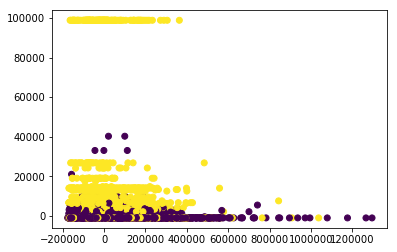

In [108]:
# EDA of the training data set 
# (According to the golden rule of machine learning, we cannot use information in test dataset to 
# help determine model built. Also, the training data has the same structure as the test data, so I am not showing EDA of the test data here)

# Using PCA to reduce dimension to 2 and plot data
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
Z= pca.fit_transform(X)

plt.scatter(Z[:,0], Z[:,1],c=y)
plt.show()

**According to the plot, we can see pattern of clustering, so it is reasonable to believe that the features can be used to determine the income of people.**

## Feature selection

### 1. Fit model using linear regression

In [160]:
# linear regression
lm = LinearRegression()
lm.fit(X,y)
print("Training error is ",1-lm.score(X,y))
print("Test error is ",1-lm.score(Xtest,ytest))

Training error is  0.715372738028
Test error is  0.720788395156


**We can see that both the training error and test error is high.** 

### 2. Fit model using regularization (Ridge, Lasso, and ElasticNet)

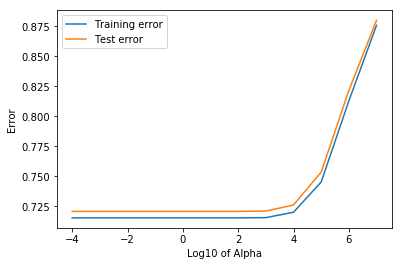

In [166]:
# Ridge regression
ran1=range(-4,8,1)
ran2=[]
for i in ran1:
    ran2.append(10**i)
    
test_error=[]
train_error=[]
for i in ran2:
    ridge=Ridge(alpha=i)
    ridge.fit(X,y)
    test_error.append(1-ridge.score(Xtest,ytest))
    train_error.append(1-ridge.score(X,y))
    
# plot
plt.plot(ran1,train_error)
plt.plot(ran1,test_error)
plt.xlabel("Log10 of Alpha")
plt.ylabel("Error")
plt.legend(["Training error","Test error"])
plt.show()

# As shown here, best value of alpha is below 1000.

In [194]:
# find number of features selected:
ridge=Ridge(alpha=1)
ridge.fit(X,y)
np.where(ridge.coef_ != 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),)

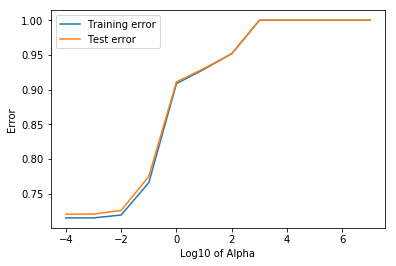

In [165]:
# Lasso regression
ran1=range(-4,8,1)
ran2=[]
for i in ran1:
    ran2.append(10**i)
    
test_error=[]
train_error=[]
for i in ran2:
    lasso=Lasso(alpha=i)
    lasso.fit(X,y)
    test_error.append(1-lasso.score(Xtest,ytest))
    train_error.append(1-lasso.score(X,y))
    
# plot
plt.plot(ran1,train_error)
plt.plot(ran1,test_error)
plt.xlabel("Log10 of Alpha")
plt.ylabel("Error")
plt.legend(["Training error","Test error"])
plt.show()

# As shown here, best value of alpha is below 10^-2.

In [191]:
# find number of features selected:
lasso=Lasso(alpha=0.01)
lasso.fit(X,y)
np.where(lasso.coef_ != 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),)

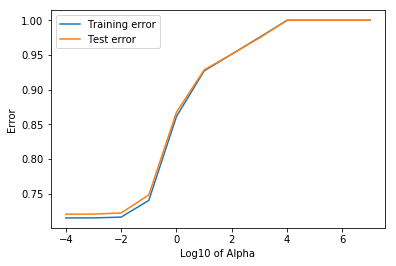

In [168]:
# L1- and L2-regularized linear regression

ran1=range(-4,8,1)
ran2=[]
for i in ran1:
    ran2.append(10**i)
    
test_error=[]
train_error=[]
for i in ran2:
    en=ElasticNet(alpha=i)
    en.fit(X,y)
    test_error.append(1-en.score(Xtest,ytest))
    train_error.append(1-en.score(X,y))
    
# plot
plt.plot(ran1,train_error)
plt.plot(ran1,test_error)
plt.xlabel("Log10 of Alpha")
plt.ylabel("Error")
plt.legend(["Training error","Test error"])
plt.show()
# As shown here, best value of alpha is below 10^-2.

In [192]:
# find number of features selected:
en=ElasticNet(alpha=0.01)
en.fit(X,y)
np.where(en.coef_ != 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),)

**Overall, the three methods still give us high training and test error, so I am trying the forward feature selection method.**

### 1. Forward Feature Selection

In [187]:
# I use validation error as my score
# start with an empty list
S=[]
lm=LinearRegression()
# validation error
ve=9999999999999
# list of all features
featurelist=list(range(14))

# first round: find the first feature
# I do it because of need to reshape
for i in featurelist:
        X1=X[:,i]
        X1=X1.reshape(-1,1)
        XV=Xtest[:,i]
        XV=XV.reshape(-1,1)
        lm.fit(X1, y)
        vet=1-lm.score(XV, ytest)
        if vet<ve:
            f=i
            ve=vet
S.append(f)

# prepare for next step
S.append(500) # it can be any number larger than 300
featurelist.remove(f)

# afterwards:

for j in range(1,300):
    vetl=[]
    fl=[]
    for i in featurelist:
        S[j]=i
        lm.fit(X[:,S], y)
        vetl.append(1-lm.score(Xtest[:,S], ytest))
        fl.append(i)
    vet=min(vetl)
    # if the validation loss is below 0.01, I stop the loop
    if ve-vet<0.001:
         break
    else: 
        f=fl[vetl.index(min(vetl))]
        ve=vet
        S[j]=f
        S.append(500)
        featurelist.remove(f)
    
S   

[4, 0, 9, 7, 10, 12, 11, 5, 1, 8, 3, 6, 13]

**According to the forward feature selection result, all 13 features are selected, ordered by the importance of each feature.**

In [188]:
# find training error and test error based on selected features:
lm.fit(X[:,S], y)
print("Training error is", 1-lm.score(X[:,S], y))
print("Test error is ",1-lm.score(Xtest[:,S], ytest))

Training error is 0.715994670197
Test error is  0.721342840862


## Final conclusion 

**Based on the results we can see that it is hard to reduce features. If we remove features, both the training error and test error increases a lot.**